<a href="https://colab.research.google.com/github/NotHumans211/Google-Colab/blob/main/Statistik_Liverpool_23_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

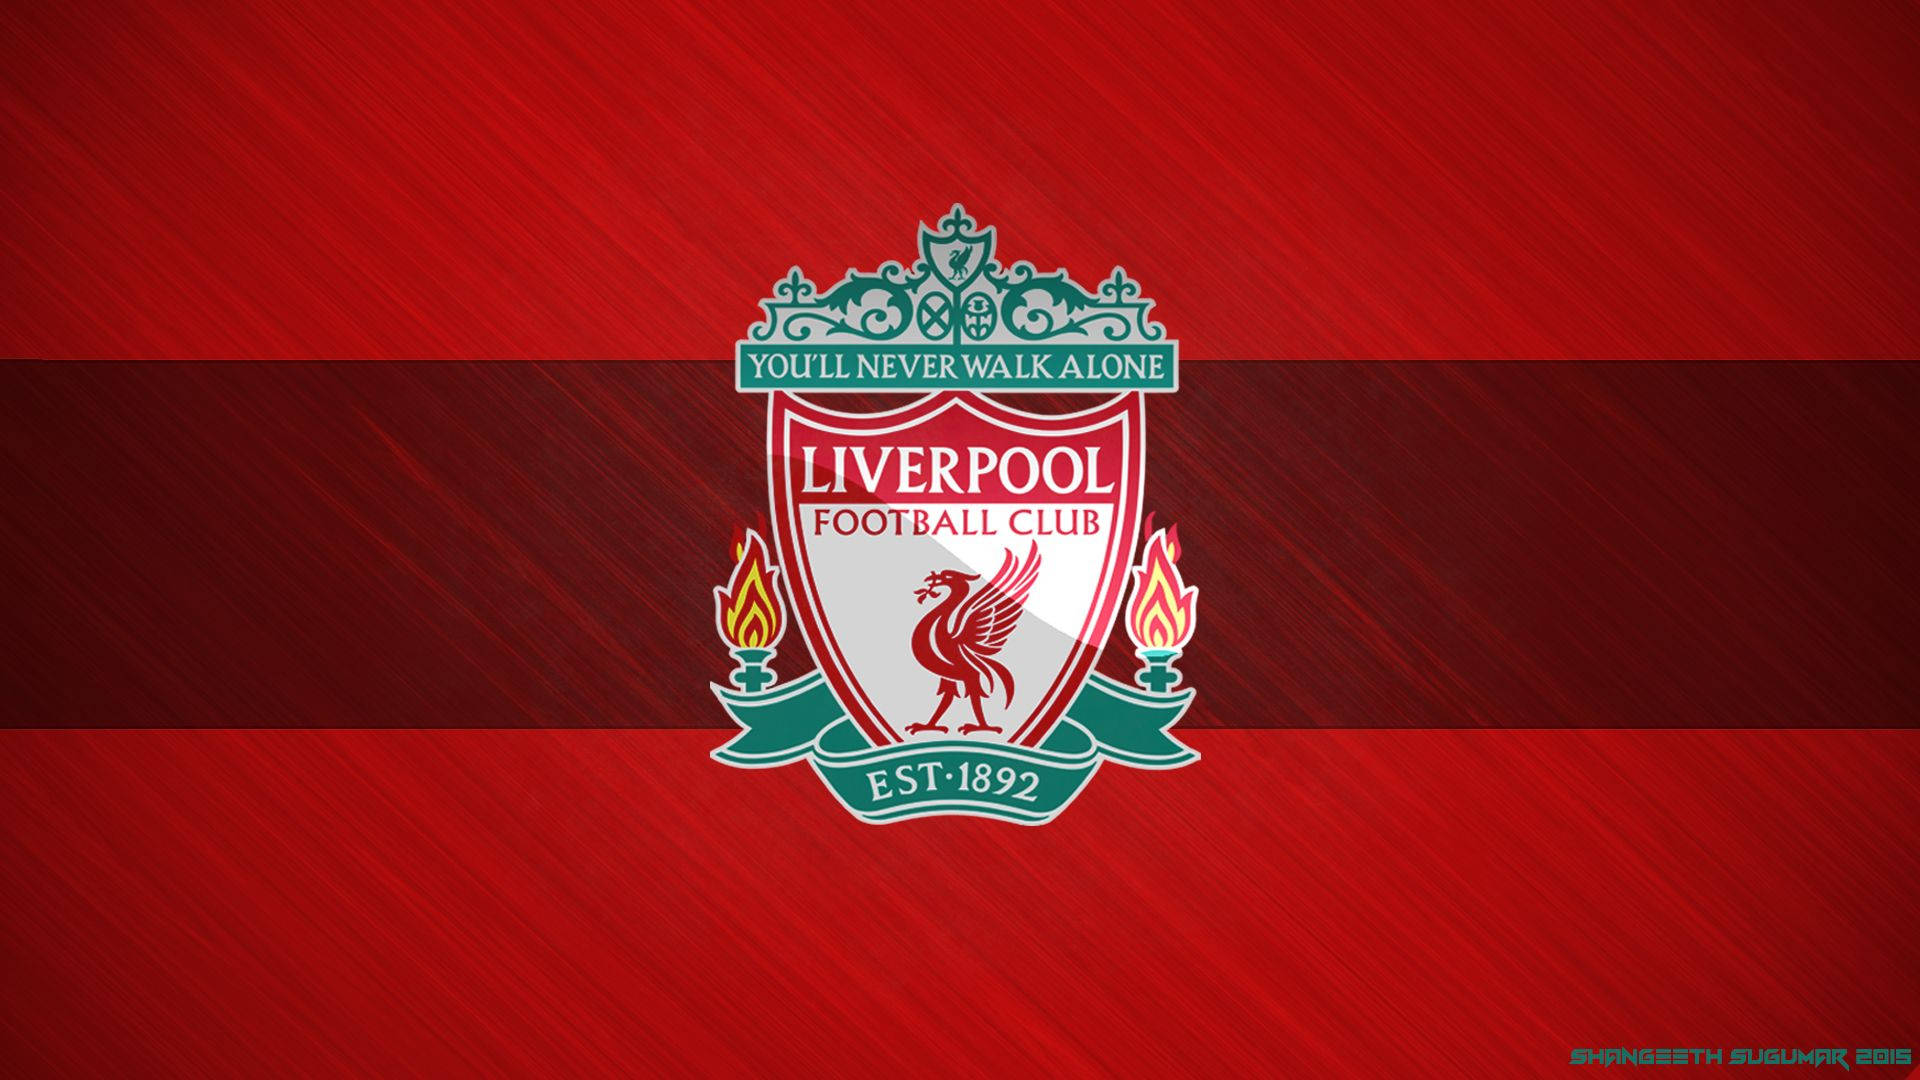
# **Analisa Liverpool 23/24**
Liverpool 23/24 Season Stats
That dataset includes just Premier League stats of Liverpool :[teks link](https://www.kaggle.com/datasets/keremkarayaz/liverpool-2324-season-stats)

Copyright by Moh Yahya

#1. Load Dataset



In [1]:
# Step 1: Memuat Dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load dataset
file_path = 'deneme_1 Liverpool.csv'
# Ganti dengan path dataset Anda di Google Colab
liverpool_df = pd.read_csv(file_path)
print(liverpool_df.head())

   player_id first_name         last_name  age nation  mp  starts    Mt  \
0          1    Allison            Becker   31    BRA  21      21  1890   
1          2     Virgil          Van Dijk   32    NED  23      23  2007   
2          3    Mohamed             Salah   31    EGY  21      20  1786   
3          4    Dominik        Szoboszlai   23    HUN  21      20  1657   
4          5      Trent  Alexander-Arnold   25    ENG  21      19  1622   

   full_match  goals  assist pos  
0          21      0       0  GK  
1          22      1       2  DF  
2          20     15       9  FW  
3          18      3       2  MF  
4          18      2       4  DF  


#2. Eksplorasi Data

In [6]:
print(liverpool_df.head())
print(liverpool_df.info())
print(liverpool_df.describe())

   player_id first_name         last_name  age nation  mp  starts    Mt  \
0          1    Allison            Becker   31    BRA  21      21  1890   
1          2     Virgil          Van Dijk   32    NED  23      23  2007   
2          3    Mohamed             Salah   31    EGY  21      20  1786   
3          4    Dominik        Szoboszlai   23    HUN  21      20  1657   
4          5      Trent  Alexander-Arnold   25    ENG  21      19  1622   

   full_match  goals  assist pos  
0          21      0       0  GK  
1          22      1       2  DF  
2          20     15       9  FW  
3          18      3       2  MF  
4          18      2       4  DF  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   player_id   36 non-null     int64 
 1   first_name  36 non-null     object
 2   last_name   36 non-null     object
 3   age         36 non-null     int

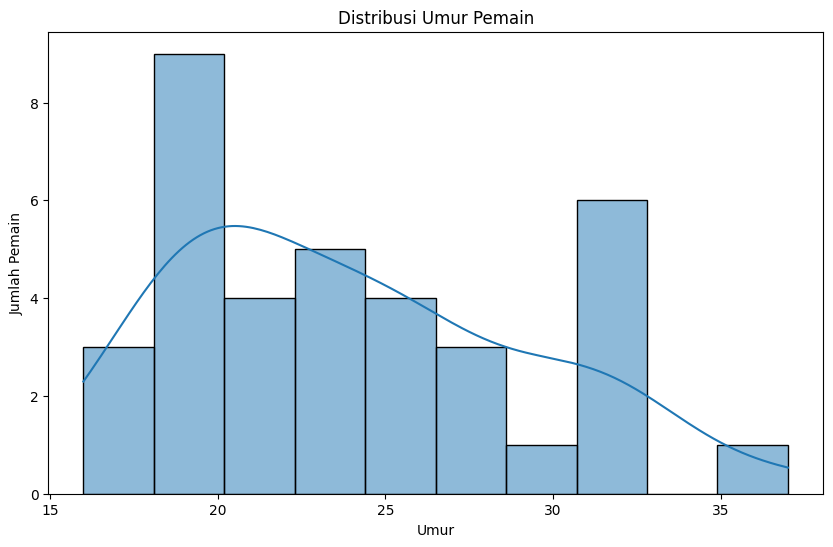

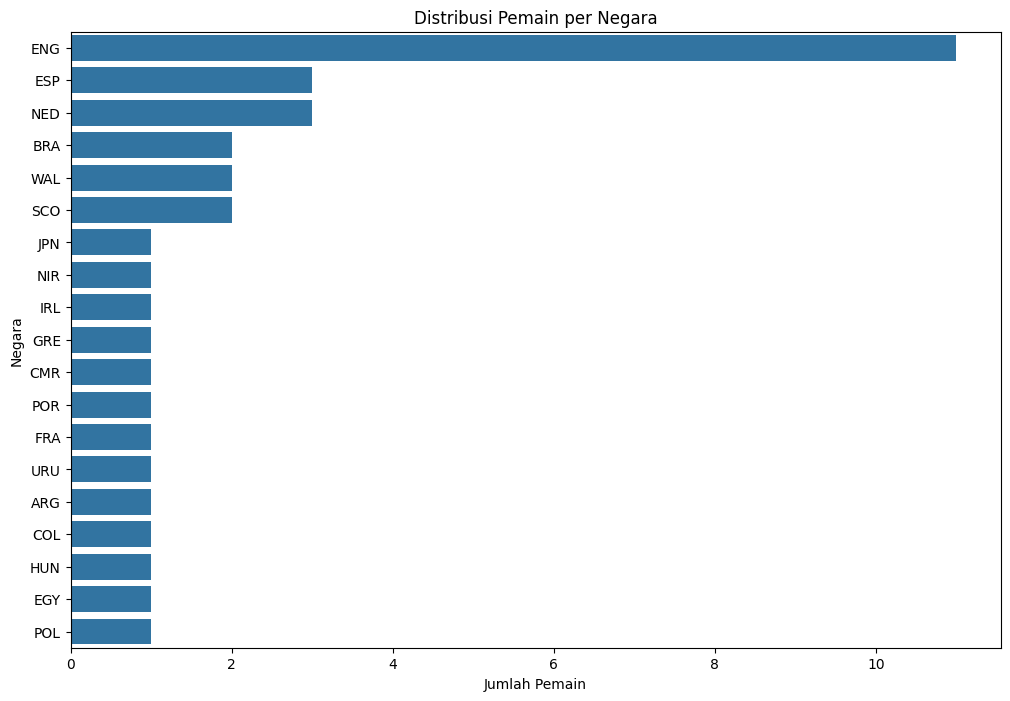

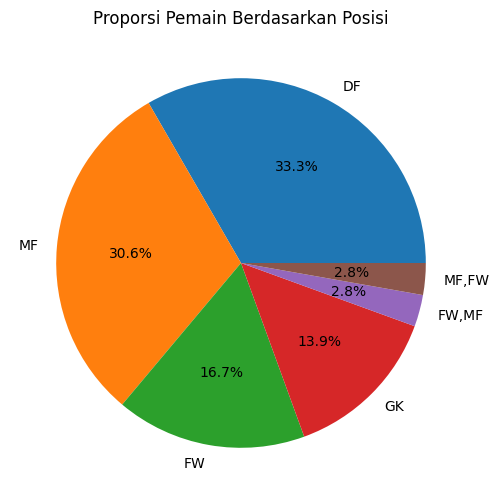

In [11]:
# Distribusi umur pemain
plt.figure(figsize=(10, 6))
sns.histplot(liverpool_df['age'], bins=10, kde=True)
plt.title('Distribusi Umur Pemain')
plt.xlabel('Umur')
plt.ylabel('Jumlah Pemain')
plt.show()

# Distribusi pemain per negara
plt.figure(figsize=(12, 8))
sns.countplot(y='nation', data=liverpool_df, order=liverpool_df['nation'].value_counts().index)
plt.title('Distribusi Pemain per Negara')
plt.xlabel('Jumlah Pemain')
plt.ylabel('Negara')
plt.show()

# Proporsi pemain berdasarkan posisi
plt.figure(figsize=(10, 6))
liverpool_df['pos'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Proporsi Pemain Berdasarkan Posisi')
plt.ylabel('')
plt.show()


#3. Analisis Kinerja Pemain

Korelasi antara gol dengan menit bermain: 0.5244768906436919


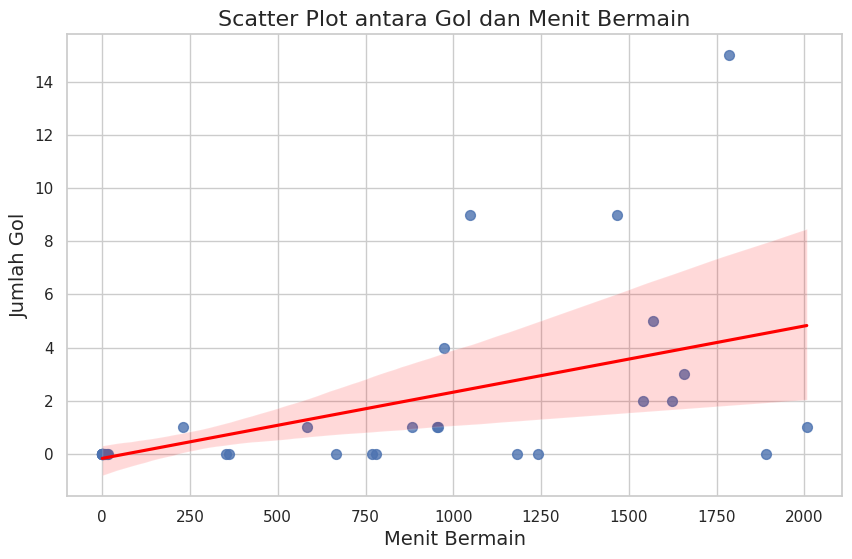

Korelasi antara assists dengan match starts: 0.5700608308530196


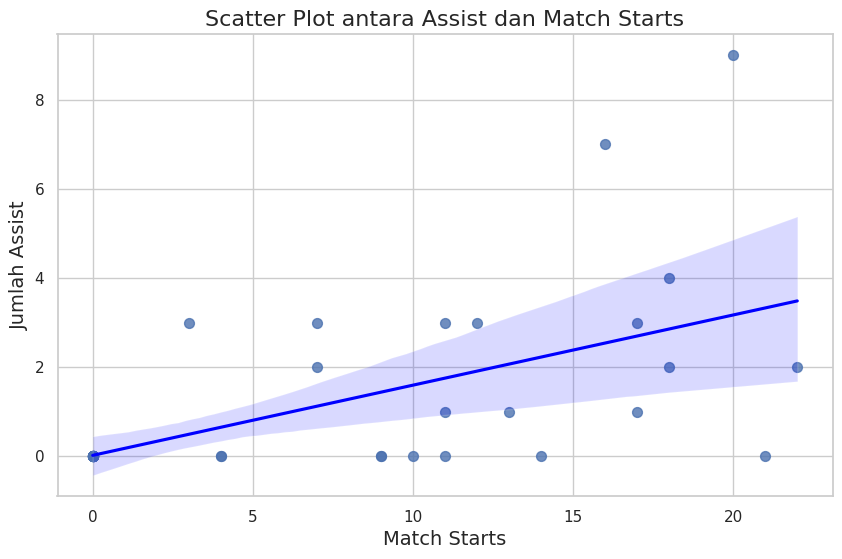

Pemain dengan gol terbanyak:
   player_id first_name last_name  age nation  mp  starts    Mt  full_match  \
2          3    Mohamed     Salah   31    EGY  21      20  1786          20   

   goals  assist pos  
2     15       9  FW  


<ipython-input-18-638404dfa7eb>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_scorer['goals'], y=top_scorer['last_name'], palette='viridis')


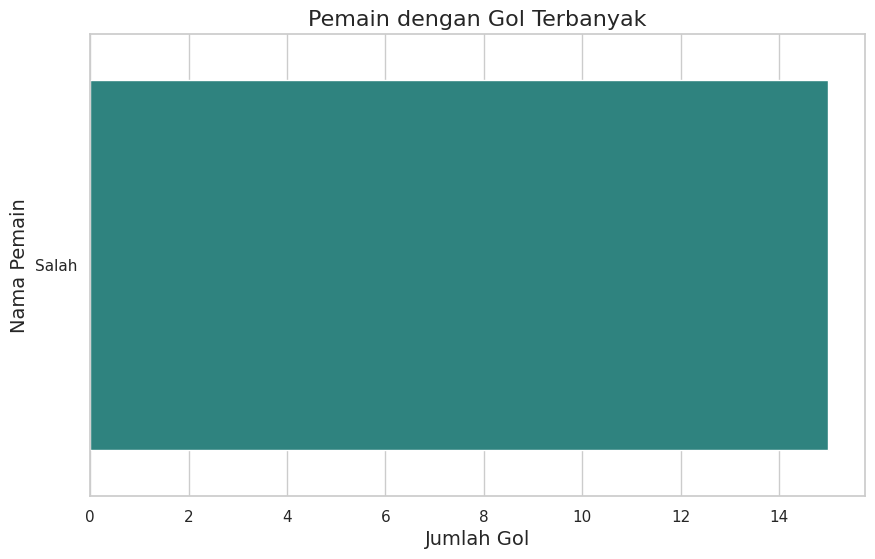

Pemain dengan assist terbanyak:
   player_id first_name last_name  age nation  mp  starts    Mt  full_match  \
2          3    Mohamed     Salah   31    EGY  21      20  1786          20   

   goals  assist pos  
2     15       9  FW  


<ipython-input-18-638404dfa7eb>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_assist['assist'], y=top_assist['last_name'], palette='magma')


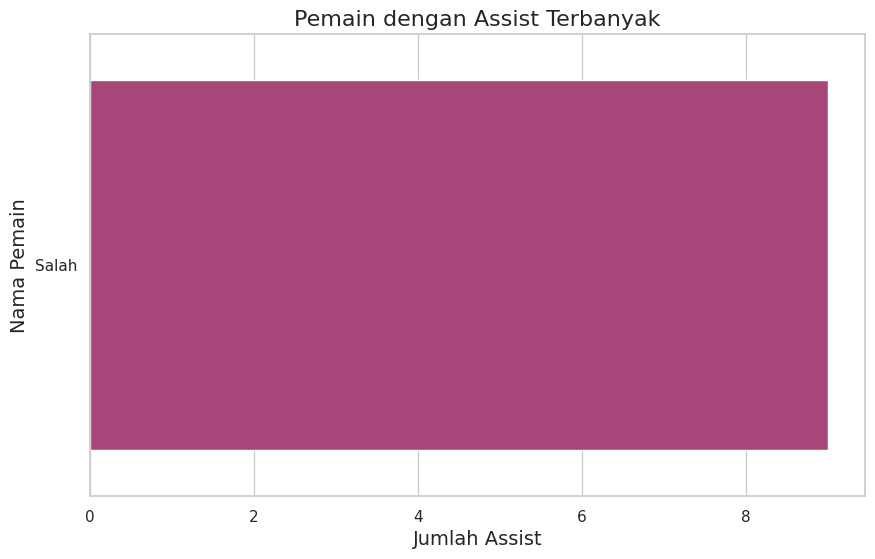

In [18]:
# Set tema untuk seaborn
sns.set_theme(style="whitegrid")

# Korelasi antara gol dengan menit bermain
correlation_goals_minutes = liverpool_df['goals'].corr(liverpool_df['Mt'])
print(f'Korelasi antara gol dengan menit bermain: {correlation_goals_minutes}')

# Visualisasi 1: Scatter plot antara gol dan menit bermain dengan regresi
plt.figure(figsize=(10, 6))
sns.regplot(x='Mt', y='goals', data=liverpool_df, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Scatter Plot antara Gol dan Menit Bermain', fontsize=16)
plt.xlabel('Menit Bermain', fontsize=14)
plt.ylabel('Jumlah Gol', fontsize=14)
plt.show()

# Korelasi antara assists dengan match starts
correlation_assists_starts = liverpool_df['assist'].corr(liverpool_df['full_match'])
print(f'Korelasi antara assists dengan match starts: {correlation_assists_starts}')

# Visualisasi 2: Scatter plot antara assist dan match starts dengan regresi
plt.figure(figsize=(10, 6))
sns.regplot(x='full_match', y='assist', data=liverpool_df, scatter_kws={'s':50}, line_kws={'color':'blue'})
plt.title('Scatter Plot antara Assist dan Match Starts', fontsize=16)
plt.xlabel('Match Starts', fontsize=14)
plt.ylabel('Jumlah Assist', fontsize=14)
plt.show()

# Pemain dengan gol terbanyak
top_scorer = liverpool_df[liverpool_df['goals'] == liverpool_df['goals'].max()]
print(f'Pemain dengan gol terbanyak:\n{top_scorer}')

# Visualisasi 3: Bar plot pemain dengan gol terbanyak
plt.figure(figsize=(10, 6))
sns.barplot(x=top_scorer['goals'], y=top_scorer['last_name'], palette='viridis')
plt.title('Pemain dengan Gol Terbanyak', fontsize=16)
plt.xlabel('Jumlah Gol', fontsize=14)
plt.ylabel('Nama Pemain', fontsize=14)
plt.show()

# Pemain dengan assists terbanyak
top_assist = liverpool_df[liverpool_df['assist'] == liverpool_df['assist'].max()]
print(f'Pemain dengan assist terbanyak:\n{top_assist}')

# Visualisasi 4: Bar plot pemain dengan assist terbanyak
plt.figure(figsize=(10, 6))
sns.barplot(x=top_assist['assist'], y=top_assist['last_name'], palette='magma')
plt.title('Pemain dengan Assist Terbanyak', fontsize=16)
plt.xlabel('Jumlah Assist', fontsize=14)
plt.ylabel('Nama Pemain', fontsize=14)
plt.show()

#4. Visualisasi Lanjutan

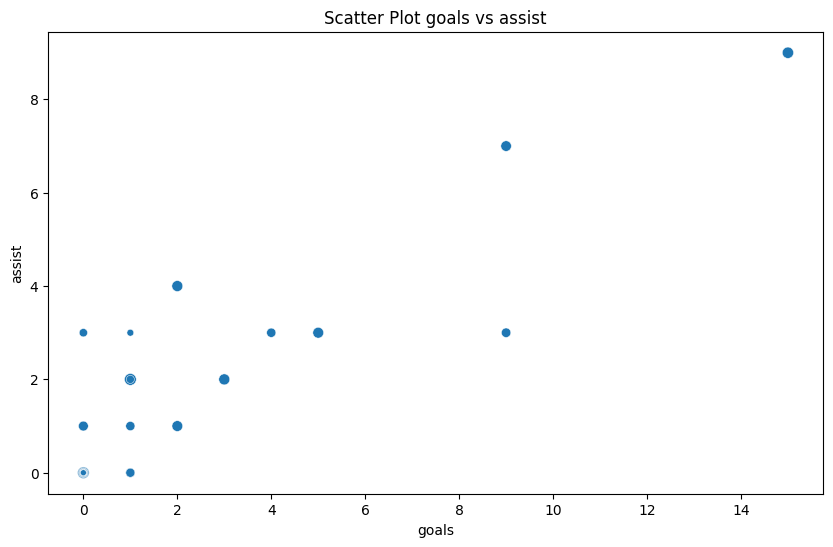

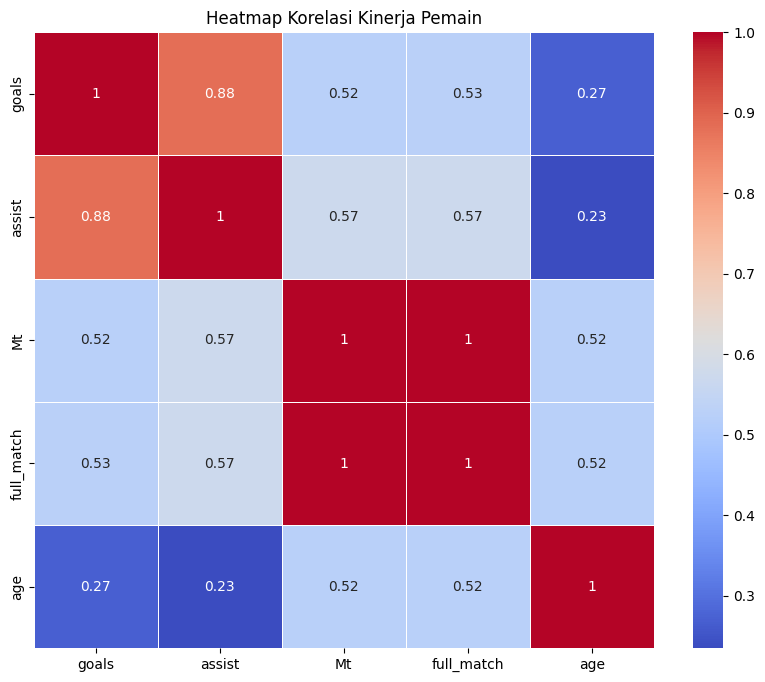

In [14]:
# Scatter plot gol vs assist
plt.figure(figsize=(10, 6))
sns.scatterplot(x='goals', y='assist', size='Mt', data=liverpool_df, legend=False)
plt.title('Scatter Plot goals vs assist')
plt.xlabel('goals')
plt.ylabel('assist')
plt.show()

# Heatmap korelasi variabel
plt.figure(figsize=(10, 8))
corr_matrix = liverpool_df[['goals', 'assist', 'Mt', 'full_match', 'age']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi Kinerja Pemain')
plt.show()

#5. Analisis Kategori

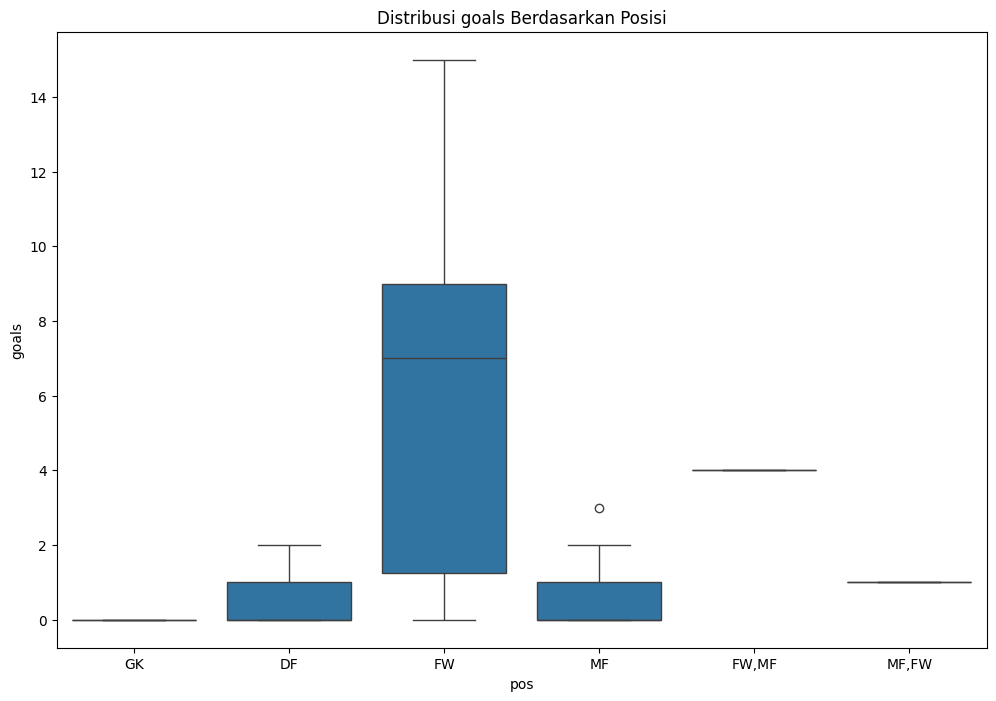

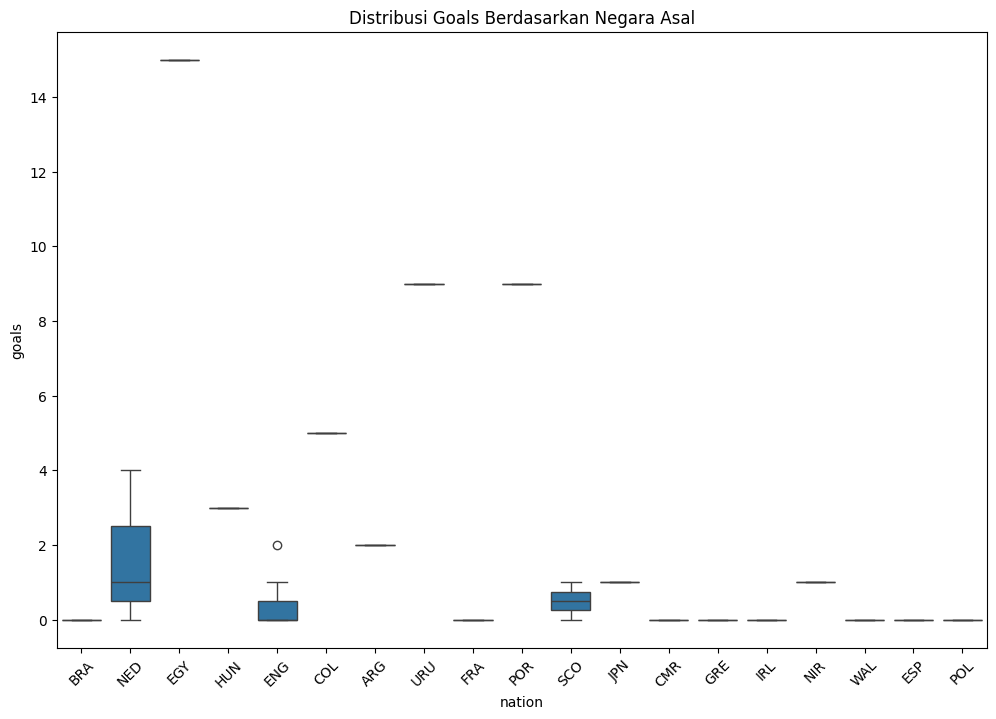

In [15]:
# Analisis kinerja berdasarkan posisi
plt.figure(figsize=(12, 8))
sns.boxplot(x='pos', y='goals', data=liverpool_df)
plt.title('Distribusi goals Berdasarkan Posisi')
plt.xlabel('pos')
plt.ylabel('goals')
plt.show()

# Distribusi pemain per negara berdasarkan gol
plt.figure(figsize=(12, 8))
sns.boxplot(x='nation', y='goals', data=liverpool_df)
plt.title('Distribusi Goals Berdasarkan Negara Asal')
plt.xlabel('nation')
plt.ylabel('goals')
plt.xticks(rotation=45)
plt.show()